## Question 1:
### b) Number of datasets: 100

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.linalg import sqrtm
import math
from sklearn.mixture import GaussianMixture

In [111]:
t_mu = [[2, 2], [-2, 2], [-2, -2], [2, -2]]
t_var_1 = [[0.1, 0], [0, 0.1]]
t_var_2 = [[0.2, 0.1], [0.1, 0.3]]
t_var_3 = [[0.3, 0], [0, 0.2]]
t_var_4 = [[0.2, 0], [0, 0.3]]
prior = [0.30, 0.25, 0.28, 0.17]

M = 6
N = 100
l_1 = 0
l_2 = 0
l_3 = 0
l_4 = 0

likelihood = []
bic = []

In [112]:
#generating number of sample for the GMMs
for i in range(N):
    temp = np.random.uniform(0, 1, 1)
    if temp <= prior[0]:
        l_1 = l_1 + 1
    elif temp <= prior[0] + prior[1]:
        l_2 = l_2 + 1
    elif temp <= prior[0] + prior[1] + prior[2]:
        l_3 = l_3 + 1
l_4 = N - l_1 - l_2 - l_3

In [113]:
#generating data according to component
data = []

for i in range(l_1):
    data.append(np.random.multivariate_normal(t_mu[0], t_var_1, 1))
for i in range(l_2):
    data.append(np.random.multivariate_normal(t_mu[1], t_var_2, 1))
for i in range(l_3):
    data.append(np.random.multivariate_normal(t_mu[2], t_var_3, 1))
for i in range(l_4):
    data.append(np.random.multivariate_normal(t_mu[3], t_var_4, 1))

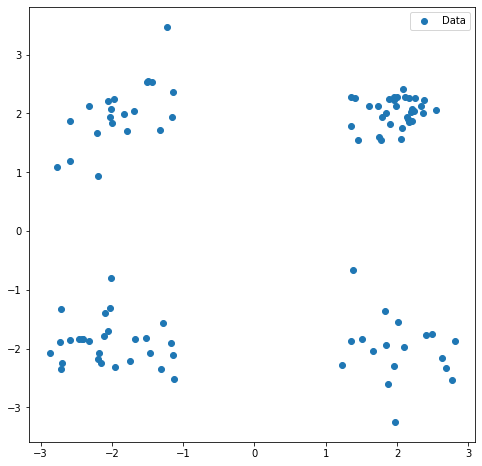

In [114]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.array(data).reshape(N,2)[:, 0], np.array(data).reshape(N,2)[:, 1], alpha=1, label='Data')
ax.legend()
plt.show()

In [115]:
for h in range(M):
    sum_3 = 0
    for c in range(10):
        sum_2 = 0
        new_data = []
        for d in range(0, int(0.1*N*c), 1):
            new_data.append(np.array(data).reshape(N,2)[int(d), :])
        for d in range(int(0.1*N*(c+1)), N, 1):
            new_data.append(np.array(data).reshape(N,2)[int(d), :])
        gmm = GaussianMixture(n_components = h+1)
        label = gmm.fit_predict(np.array(new_data).reshape(int(0.9*N), 2))
        alpha = gmm.weights_
        mean = gmm.means_
        covariance = gmm.covariances_
        for i in range(int(0.1*N*c), int(0.1*N*(c+1)), 1):
            sum_1 = 0
            for j in range(h+1):
                p = math.exp(-0.5*np.matmul(np.matmul((np.array(data).reshape(N,2)[i,:]) - mean[j,:], 
                    np.linalg.inv(covariance[j])), (np.array(data).reshape(N,2)[i,:]) - mean.reshape(h+1,2)[j,:]))/(2*math.pi*np.linalg.det(covariance[j]))
                sum_1 = sum_1 + alpha[j]*p
            sum_2 = sum_2 + np.log(sum_1)
        sum_3 = sum_3 +sum_2
    if np.isinf(sum_3) == True:
        likelihood.append(-10**5)
        bic.append(10**5 + h**3*np.log(N))
    else:
        likelihood.append(sum_3/N)
        bic.append(-2*sum_3 + h**3*np.log(N))

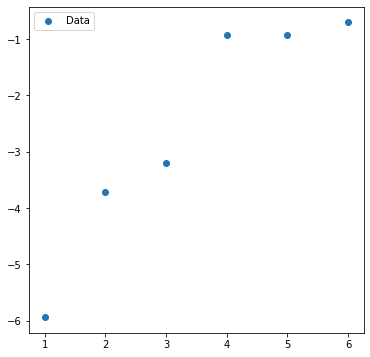

In [116]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter([1,2,3,4,5,6], np.array(likelihood), alpha=1, label='Data')
ax.legend()
plt.show()

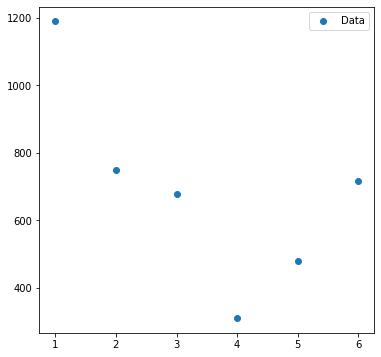

In [117]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter([1,2,3,4,5,6], np.array(bic), alpha=1, label='Data')
ax.legend()
plt.show()

In [118]:
print(likelihood)

[-5.942509754929267, -3.7140544837987135, -3.203501957389327, -0.9317017901524847, -0.9212217334601267, -0.6975922646844022]


In [119]:
print(bic)

[1188.5019509858535, 747.4160669457308, 677.5417529657701, 310.6799530521754, 478.97523859526325, 715.1647261853918]


In [120]:
print("The GMM order that gets selected based on the likelihood values is : {}".format(np.argmax(likelihood)+1))
print("The GMM order that gets selected based on the BIC values is : {}".format(np.argmin(bic)+1))

The GMM order that gets selected based on the likelihood values is : 6
The GMM order that gets selected based on the BIC values is : 4
